Data Import 

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [3]:
from pandas_datareader import data as wb

## Data Cleaning

In this section, read the CSV files into DataFrames and perform necessary data cleaning steps. 

After cleaning, combine all DataFrames into a single DataFrame.


In [4]:
# Read in corn actual price
corn_prices_csv = Path("../Resources/corn-prices-historical-chart-data.csv")
corn_prices = pd.read_csv(corn_prices_csv)

# Drop corn actual price data prior to 2000
corn_prices = corn_prices[~(corn_prices["date"] < '1999-12-31')]
corn_prices['date'] = pd.to_datetime(corn_prices['date'])
corn_prices.set_index('date', inplace=True)
corn_prices = corn_prices.sort_index()
corn_prices.rename(columns={"value":"corn_price"}, inplace=True)
corn_prices.head()

,corn_price
date,
2000-01-03,2.0075
2000-01-04,2.0300
2000-01-05,2.0300
2000-01-06,2.0375
2000-01-07,2.0700


In [5]:
# Data file paths
usd_index_daily_csv = Path("../Resources/US Dollar Index Daily Data.csv")
usd_index_futures_csv = Path("../Resources/US Dollar Index Futures Daily Data.csv")
ethanol_futures_data_csv = Path("../Resources/Ethanol Futures Historical Data.csv")

In [6]:
# Read in USD Index daily file
usd_index_daily = pd.read_csv(usd_index_daily_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
usd_index_daily = usd_index_daily.sort_index()
usd_index_daily = usd_index_daily.drop(columns=['Open','High', 'Low', 'Vol.', 'Change %'])
usd_index_daily.rename(columns={"Price":"usd_index"},inplace=True)
usd_index_daily.head()

,usd_index
Date,
2000-01-03,100.22
2000-01-04,100.41
2000-01-05,100.38
2000-01-06,100.65
2000-01-07,100.80


In [7]:
# Read in USD index futures
usd_index_futures = pd.read_csv(usd_index_futures_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
usd_index_futures = usd_index_futures.sort_index()
usd_index_futures = usd_index_futures.drop(columns=['Open','High', 'Low', 'Vol.', 'Change %'])
usd_index_futures.rename(columns={"Price":"usd_index_futures"},inplace=True)
usd_index_futures.head()

,usd_index_futures
Date,
2000-01-03,99.89
2000-01-04,100.10
2000-01-05,100.05
2000-01-06,100.34
2000-01-07,100.50


In [8]:
# Read in ethanol futures data
ethanol_futures_data = pd.read_csv(ethanol_futures_data_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
ethanol_futures_data = ethanol_futures_data.sort_index()
ethanol_futures_data = ethanol_futures_data.drop(columns=['Open','High', 'Low', 'Vol.', 'Change %'])
ethanol_futures_data.rename(columns={"Price":"ethanol_futures"},inplace=True)
ethanol_futures_data.head()

,ethanol_futures
Date,
2005-04-12,1.17
2005-04-13,1.17
2005-04-14,1.17
2005-04-15,1.17
2005-04-18,1.17


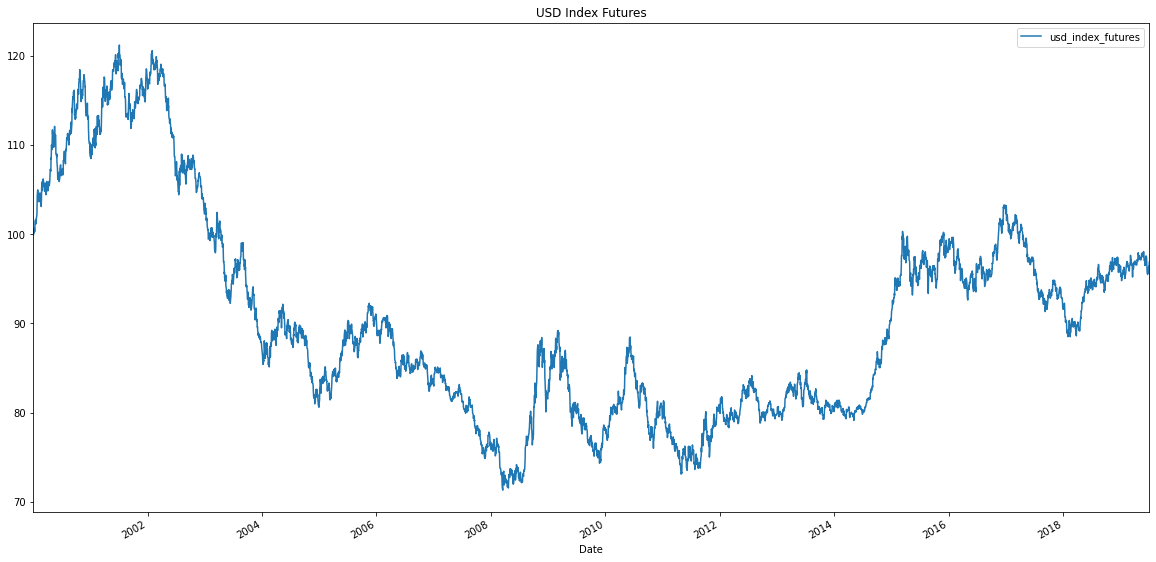

In [9]:
usd_index_futures.plot(figsize=(20, 10), title="USD Index Futures")

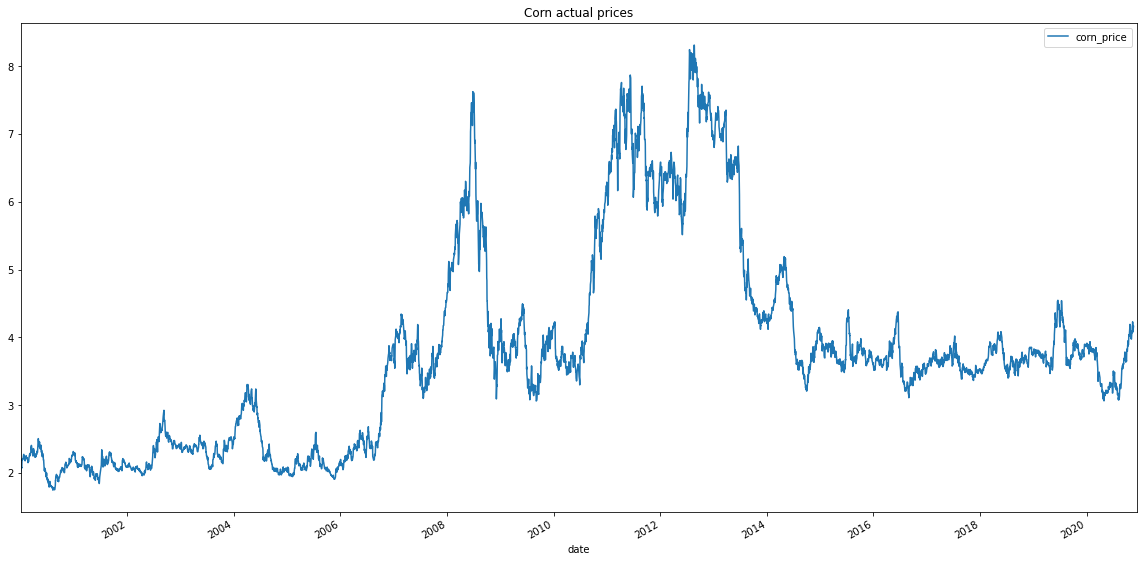

In [12]:
corn_prices.plot(figsize=(20, 10), title = "Corn actual prices")

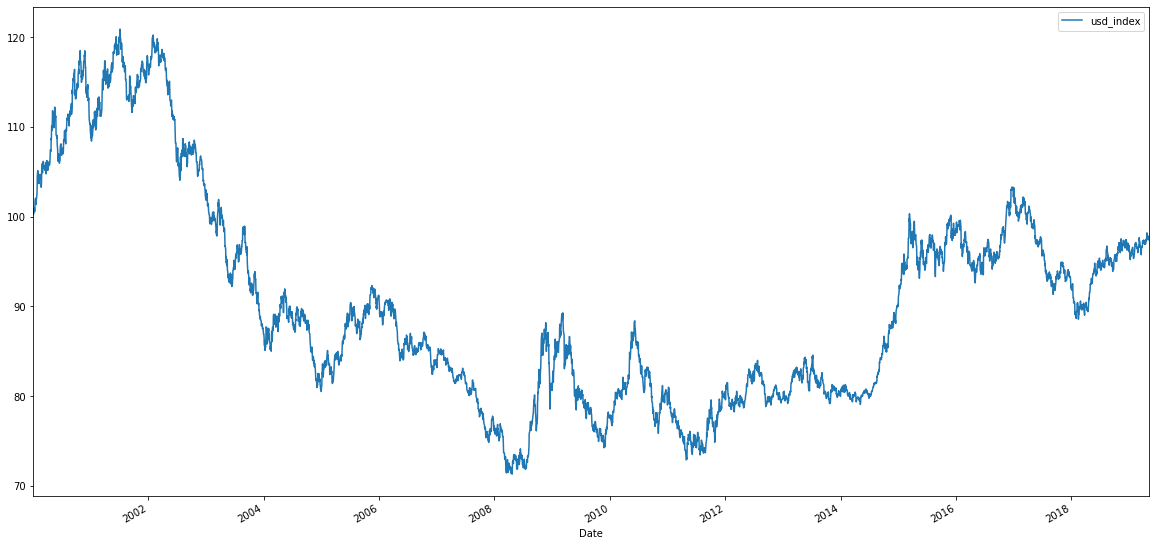

In [13]:
usd_index_daily.plot(figsize=(20, 10))

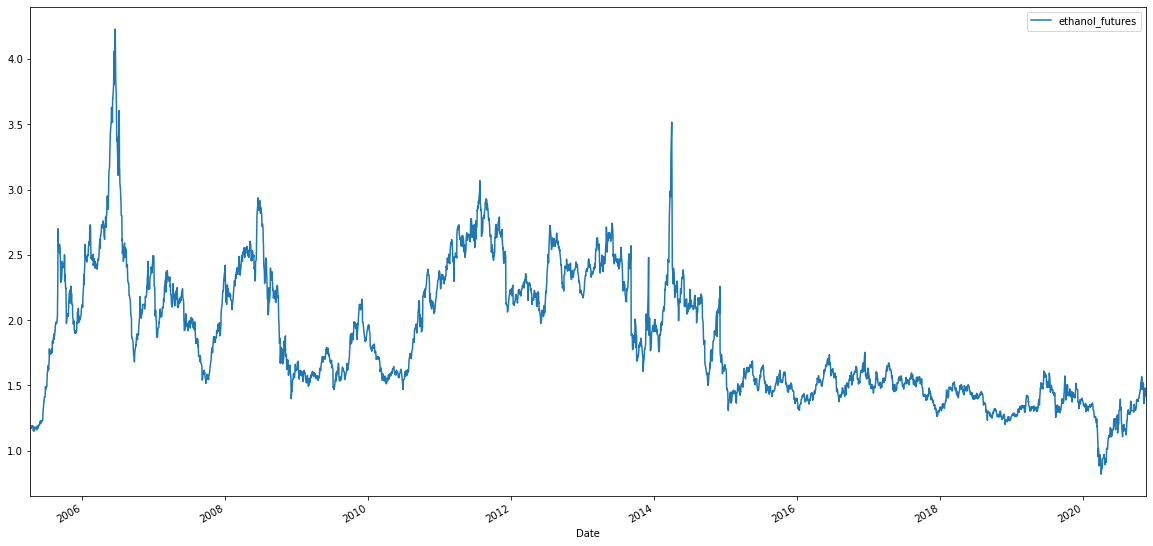

In [14]:
ethanol_futures_data.plot(figsize=(20, 10))

In [15]:
weather_csv = Path("../Resources/corn_belt_weather.csv")
weather_data = pd.read_csv(weather_csv, index_col="date", infer_datetime_format=True, parse_dates=True)
weather_data = weather_data.sort_index()
weather_data.head()

,PRCP_Illinois,TMAX_Illinois,TMIN_Illinois,PRCP_Indiana,TMAX_Indiana,TMIN_Indiana,PRCP_Iowa,TMAX_Iowa,TMIN_Iowa,PRCP_Nebraska,TMAX_Nebraska,TMIN_Nebraska,PRCP_Ohio,TMAX_Ohio,TMIN_Ohio
date,,,,,,,,,,,,,,,
2000-01-01,0.000000,7.78,-2.340000e+00,0.00,10.6375,-3.4125,0.000000,6.94,-4.16,0.0000,9.757143,-5.785714,0.000000,9.1000,-5.700000
2000-01-02,0.166667,12.44,8.800000e-01,0.31,15.2125,1.3250,0.254545,5.50,-0.66,0.0375,6.312500,-7.425000,0.000000,13.6125,-0.287500
2000-01-03,0.000000,13.44,8.881784e-17,23.47,15.8375,5.7625,0.254545,4.43,-1.72,0.2875,0.975000,-10.062500,6.387500,17.0875,6.812500
2000-01-04,5.533333,3.00,-5.000000e+00,19.61,13.0000,-0.5625,3.140000,-1.16,-10.92,0.1250,-2.000000,-19.100000,33.162500,14.2875,4.662500
2000-01-05,0.000000,-1.10,-1.256000e+01,0.34,0.2875,-5.5000,0.000000,-4.38,-14.89,0.0750,3.837500,-11.187500,1.157143,6.1250,-3.571429


In [17]:
test_df = pd.concat([corn_prices, usd_index_daily, usd_index_futures, ethanol_futures_data, weather_data],axis=1, join="inner")
test_df.head()

,corn_price,usd_index,usd_index_futures,ethanol_futures,PRCP_Illinois,TMAX_Illinois,TMIN_Illinois,PRCP_Indiana,TMAX_Indiana,TMIN_Indiana,PRCP_Iowa,TMAX_Iowa,TMIN_Iowa,PRCP_Nebraska,TMAX_Nebraska,TMIN_Nebraska,PRCP_Ohio,TMAX_Ohio,TMIN_Ohio
2005-04-12,2.0675,84.42,84.40,1.17,21.133333,19.46,9.34,3.27,23.2625,9.500000,27.109091,17.736364,9.363636,1.1125,10.0750,0.775000,1.8125,21.9250,6.6000
2005-04-13,2.0575,84.42,84.40,1.17,13.750000,13.68,4.20,5.22,14.4500,4.862500,2.718182,16.427273,4.600000,0.1625,13.8750,2.500000,0.9500,16.4500,4.4375
2005-04-14,2.0750,85.00,84.99,1.17,0.050000,16.46,3.00,0.89,18.2000,2.500000,0.000000,17.218182,1.872727,0.0000,17.0875,2.975000,0.0375,18.1375,2.5625
2005-04-15,2.0625,84.56,84.50,1.17,0.000000,18.76,3.66,0.00,19.9250,2.614286,0.000000,20.563636,3.481818,4.3875,18.5500,3.900000,0.0000,19.1125,2.0875
2005-04-18,2.0425,84.00,83.97,1.17,0.000000,26.54,11.12,0.00,25.5500,11.162500,0.000000,26.500000,11.454545,0.0000,26.6000,10.228571,0.0000,24.8000,7.6250
